In [1]:
import pandas as pd
import os
import numpy as np
pd.options.display.max_columns = 50

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
project_dir = r'F:\Projects\Clients\mtc\updated_networks\version_final'
iteration = 3

census_auto_ownership_file = os.path.join(project_dir,r'input\visualizer\data\census\ACS_2017_5yr_auto_ownership\ACSDT5Y2017.B08201_data_with_overlays_2021-09-21T122354.csv')
ct_ao = pd.read_csv(census_auto_ownership_file, header=1)

hh = pd.read_csv(os.path.join(project_dir, r'ctramp_output\householdData_' + str(iteration) + '.csv'))
xwalk = pd.read_csv(os.path.join(project_dir, r'input\visualizer\data\SHP\census_tracts_mazs_tazs_v2.2.csv'))

In [3]:
# ct_ao  = pd.read_csv(r'F:\Projects\Clients\mtc\updated_networks\MTC_Visualizer\data\census\ACS_2017_5yr_auto_ownership\ACSDT5Y2017.B08201_data_with_overlays_2021-09-21T122354.csv',
#                     header=1)

In [4]:
ct_ao.head()

,id,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,Estimate!!Total!!No vehicle available,Margin of Error!!Total!!No vehicle available,Estimate!!Total!!1 vehicle available,Margin of Error!!Total!!1 vehicle available,Estimate!!Total!!2 vehicles available,Margin of Error!!Total!!2 vehicles available,Estimate!!Total!!3 vehicles available,Margin of Error!!Total!!3 vehicles available,Estimate!!Total!!4 or more vehicles available,Margin of Error!!Total!!4 or more vehicles available,Estimate!!Total!!1-person household,Margin of Error!!Total!!1-person household,Estimate!!Total!!1-person household!!No vehicle available,Margin of Error!!Total!!1-person household!!No vehicle available,Estimate!!Total!!1-person household!!1 vehicle available,Margin of Error!!Total!!1-person household!!1 vehicle available,Estimate!!Total!!1-person household!!2 vehicles available,Margin of Error!!Total!!1-person household!!2 vehicles available,Estimate!!Total!!1-person household!!3 vehicles available,Margin of Error!!Total!!1-person household!!3 vehicles available,Estimate!!Total!!1-person household!!4 or more vehicles available,...,Margin of Error!!Total!!2-person household!!4 or more vehicles available,Estimate!!Total!!3-person household,Margin of Error!!Total!!3-person household,Estimate!!Total!!3-person household!!No vehicle available,Margin of Error!!Total!!3-person household!!No vehicle available,Estimate!!Total!!3-person household!!1 vehicle available,Margin of Error!!Total!!3-person household!!1 vehicle available,Estimate!!Total!!3-person household!!2 vehicles available,Margin of Error!!Total!!3-person household!!2 vehicles available,Estimate!!Total!!3-person household!!3 vehicles available,Margin of Error!!Total!!3-person household!!3 vehicles available,Estimate!!Total!!3-person household!!4 or more vehicles available,Margin of Error!!Total!!3-person household!!4 or more vehicles available,Estimate!!Total!!4-or-more-person household,Margin of Error!!Total!!4-or-more-person household,Estimate!!Total!!4-or-more-person household!!No vehicle available,Margin of Error!!Total!!4-or-more-person household!!No vehicle available,Estimate!!Total!!4-or-more-person household!!1 vehicle available,Margin of Error!!Total!!4-or-more-person household!!1 vehicle available,Estimate!!Total!!4-or-more-person household!!2 vehicles available,Margin of Error!!Total!!4-or-more-person household!!2 vehicles available,Estimate!!Total!!4-or-more-person household!!3 vehicles available,Margin of Error!!Total!!4-or-more-person household!!3 vehicles available,Estimate!!Total!!4-or-more-person household!!4 or more vehicles available,Margin of Error!!Total!!4-or-more-person household!!4 or more vehicles available
0,1400000US06001400100,"Census Tract 4001, Alameda County, California",1254,65,17,19,287,66,571,105,289,85,90,42,248,59,8,13,193,56,40,26,7,12,0,...,12,212,77,0,12,9,14,104,57,72,55,27,22,177,45,0,12,15,16,65,32,41,27,56,34
1,1400000US06001400200,"Census Tract 4002, Alameda County, California",828,43,64,33,365,60,327,54,54,28,18,16,220,59,40,28,162,48,7,10,3,5,8,...,12,113,35,0,12,67,28,28,19,12,11,6,10,134,22,0,12,8,11,99,25,23,18,4,6
2,1400000US06001400300,"Census Tract 4003, Alameda County, California",2458,121,393,171,950,178,940,172,107,64,68,63,1007,191,306,139,604,184,79,65,18,29,0,...,56,271,115,0,17,63,58,155,85,53,47,0,17,276,66,0,17,24,29,219,58,15,28,18,28
3,1400000US06001400400,"Census Tract 4004, Alameda County, California",1786,74,163,65,937,118,492,97,153,77,41,35,586,94,101,53,442,89,43,29,0,12,0,...,24,295,96,0,12,81,47,124,71,68,66,22,26,242,74,0,12,90,61,106,54,46,35,0,12
4,1400000US06001400500,"Census Tract 4005, Alameda County, California",1625,57,224,83,714,122,486,103,148,68,53,44,510,109,124,62,359,100,11,18,5,9,11,...,12,356,98,0,12,65,49,158,70,104,58,29,43,216,52,0,12,34,29,139,48,30,28,13,21


In [5]:
error_cols = [col for col in ct_ao.columns if "Margin of Error" in col]
error_cols
ct_ao.drop(error_cols, axis='columns', inplace=True)

In [6]:
ct_ao.head()

,id,Geographic Area Name,Estimate!!Total,Estimate!!Total!!No vehicle available,Estimate!!Total!!1 vehicle available,Estimate!!Total!!2 vehicles available,Estimate!!Total!!3 vehicles available,Estimate!!Total!!4 or more vehicles available,Estimate!!Total!!1-person household,Estimate!!Total!!1-person household!!No vehicle available,Estimate!!Total!!1-person household!!1 vehicle available,Estimate!!Total!!1-person household!!2 vehicles available,Estimate!!Total!!1-person household!!3 vehicles available,Estimate!!Total!!1-person household!!4 or more vehicles available,Estimate!!Total!!2-person household,Estimate!!Total!!2-person household!!No vehicle available,Estimate!!Total!!2-person household!!1 vehicle available,Estimate!!Total!!2-person household!!2 vehicles available,Estimate!!Total!!2-person household!!3 vehicles available,Estimate!!Total!!2-person household!!4 or more vehicles available,Estimate!!Total!!3-person household,Estimate!!Total!!3-person household!!No vehicle available,Estimate!!Total!!3-person household!!1 vehicle available,Estimate!!Total!!3-person household!!2 vehicles available,Estimate!!Total!!3-person household!!3 vehicles available,Estimate!!Total!!3-person household!!4 or more vehicles available,Estimate!!Total!!4-or-more-person household,Estimate!!Total!!4-or-more-person household!!No vehicle available,Estimate!!Total!!4-or-more-person household!!1 vehicle available,Estimate!!Total!!4-or-more-person household!!2 vehicles available,Estimate!!Total!!4-or-more-person household!!3 vehicles available,Estimate!!Total!!4-or-more-person household!!4 or more vehicles available
0,1400000US06001400100,"Census Tract 4001, Alameda County, California",1254,17,287,571,289,90,248,8,193,40,7,0,617,9,70,362,169,7,212,0,9,104,72,27,177,0,15,65,41,56
1,1400000US06001400200,"Census Tract 4002, Alameda County, California",828,64,365,327,54,18,220,40,162,7,3,8,361,24,128,193,16,0,113,0,67,28,12,6,134,0,8,99,23,4
2,1400000US06001400300,"Census Tract 4003, Alameda County, California",2458,393,950,940,107,68,1007,306,604,79,18,0,904,87,259,487,21,50,271,0,63,155,53,0,276,0,24,219,15,18
3,1400000US06001400400,"Census Tract 4004, Alameda County, California",1786,163,937,492,153,41,586,101,442,43,0,0,663,62,324,219,39,19,295,0,81,124,68,22,242,0,90,106,46,0
4,1400000US06001400500,"Census Tract 4005, Alameda County, California",1625,224,714,486,148,53,510,124,359,11,5,11,543,100,256,178,9,0,356,0,65,158,104,29,216,0,34,139,30,13


In [7]:
ct_ao_output = pd.DataFrame()
ct_ao_output['GEO_ID'] = ct_ao['id']
ct_ao_output['TractID'] = ct_ao['id'].apply(lambda x: x.split('US')[1])
ct_ao_output['CensusTract'] = ct_ao['Geographic Area Name'].apply(lambda x: x.split(',')[0])
ct_ao_output['County'] = ct_ao['Geographic Area Name'].apply(lambda x: x.split(',')[1])
ct_ao_output['State'] = ct_ao['Geographic Area Name'].apply(lambda x: x.split(',')[2])
ct_ao_output['Census_HH'] = ct_ao['Estimate!!Total']
ct_ao_output['Census_A0'] = ct_ao['Estimate!!Total!!No vehicle available']
ct_ao_output['Census_A1'] = ct_ao['Estimate!!Total!!1 vehicle available']
ct_ao_output['Census_A2'] = ct_ao['Estimate!!Total!!2 vehicles available']
ct_ao_output['Census_A3'] = ct_ao['Estimate!!Total!!3 vehicles available']
ct_ao_output['Census_A4'] = ct_ao['Estimate!!Total!!4 or more vehicles available']
ct_ao_output

,GEO_ID,TractID,CensusTract,County,State,Census_HH,Census_A0,Census_A1,Census_A2,Census_A3,Census_A4
0,1400000US06001400100,06001400100,Census Tract 4001,Alameda County,California,1254,17,287,571,289,90
1,1400000US06001400200,06001400200,Census Tract 4002,Alameda County,California,828,64,365,327,54,18
2,1400000US06001400300,06001400300,Census Tract 4003,Alameda County,California,2458,393,950,940,107,68
3,1400000US06001400400,06001400400,Census Tract 4004,Alameda County,California,1786,163,937,492,153,41
4,1400000US06001400500,06001400500,Census Tract 4005,Alameda County,California,1625,224,714,486,148,53
...,...,...,...,...,...,...,...,...,...,...,...
8052,1400000US06115040800,06115040800,Census Tract 408,Yuba County,California,1503,46,385,468,368,236
8053,1400000US06115040901,06115040901,Census Tract 409.01,Yuba County,California,1056,18,293,372,242,131
8054,1400000US06115040902,06115040902,Census Tract 409.02,Yuba County,California,355,0,83,262,10,0
8055,1400000US06115041000,06115041000,Census Tract 410,Yuba County,California,2913,99,442,1204,969,199


In [8]:
# ct_ao_output.to_csv('../data/census/ACS_2017_5yr_CA_CT_AutoOwn.csv')

## Some Analysis

In [9]:
# hh = pd.read_csv(r'F:\Projects\Clients\mtc\updated_networks\version_11_v5_newer_population\ctramp_output\householdData_3.csv')

In [10]:
# xwalk = pd.read_csv(r'F:\Projects\Clients\mtc\updated_networks\MTC_Visualizer\data\SHP\census_tracts_mazs_tazs_v2.2.csv')

In [11]:
hh.head()

,hh_id,home_mgra,income,autos,automated_vehicles,transponder,cdap_pattern,jtf_choice,sampleRate,size,workers
0,17981,1,115977,1,0,1,NM0,0,0.5,2,2
1,17997,1,215535,1,0,1,NN0,0,0.5,2,0
2,17980,1,15396,2,0,1,NNMj,10,0.5,3,1
3,18005,1,479007,2,0,0,N0,0,0.5,1,1
4,17974,1,116477,2,0,1,MMNHMM0,0,0.5,6,2


In [12]:
hh['has_zero_auto'] = np.where(hh['autos'] == 0, 1, 0)
hh_xwalk = pd.merge(hh, xwalk, how='left', left_on='home_mgra', right_on='MAZSEQ')
hh_xwalk.head()

,hh_id,home_mgra,income,autos,automated_vehicles,transponder,cdap_pattern,jtf_choice,sampleRate,size,workers,has_zero_auto,MAZ_ORIGINAL,TAZ_ORIGINAL,COUNTYFP10,TRACTCE10,CTIDFP10,MAZSEQ,TAZSEQ
0,17981,1,115977,1,0,1,NM0,0,0.5,2,2,0,10001,56,75,21300,6075021300,1,56
1,17997,1,215535,1,0,1,NN0,0,0.5,2,0,0,10001,56,75,21300,6075021300,1,56
2,17980,1,15396,2,0,1,NNMj,10,0.5,3,1,0,10001,56,75,21300,6075021300,1,56
3,18005,1,479007,2,0,0,N0,0,0.5,1,1,0,10001,56,75,21300,6075021300,1,56
4,17974,1,116477,2,0,1,MMNHMM0,0,0.5,6,2,0,10001,56,75,21300,6075021300,1,56


In [13]:
ct_ao_output['TractID'] = ct_ao_output['TractID'].astype('int64')
hh_xwalk_county = pd.merge(hh_xwalk, ct_ao_output[['County', 'TractID']], how='left', left_on='CTIDFP10', right_on='TractID')

In [14]:
model_sample_rate = hh['sampleRate'].value_counts().index[0]
assert len(hh['sampleRate'].value_counts()) == 1, "Need more sophisticated model scaling to handle non-uniform sample rates"
model_sample_rate

0.5

In [15]:
model_zero_auto = hh_xwalk_county.groupby('County').agg({'has_zero_auto': sum, 'hh_id': 'count'})
model_zero_auto.columns = ['Model_A0', 'Model_HH']
model_zero_auto = model_zero_auto / model_sample_rate

In [16]:
census_zero_auto = ct_ao_output.groupby('County')[['Census_A0', 'Census_HH']].sum()
model_v_census_A0 = pd.merge(model_zero_auto, census_zero_auto, how='left', left_index=True, right_index=True)
model_v_census_A0.loc['Total'] = model_v_census_A0.sum()
model_v_census_A0 = model_v_census_A0.astype(int)
model_v_census_A0

,Model_A0,Model_HH,Census_A0,Census_HH
County,,,,
Alameda County,54414,579038,55649,569070
Contra Costa County,21878,387214,21869,389597
Marin County,5968,112256,5171,104846
Napa County,2500,52446,2508,49044
San Francisco County,121504,385844,109259,358772
San Mateo County,13316,270472,13902,261796
Santa Clara County,30312,645974,31923,630451
Solano County,7324,144372,8049,147352
Sonoma County,8726,194324,9242,190058


In [17]:
A0_df = model_v_census_A0[['Census_A0', 'Model_A0']].copy()
A0_df['difference'] = A0_df['Model_A0'] - A0_df['Census_A0']
A0_df['percent_diff'] = round((A0_df['difference'] / A0_df['Census_A0']) * 100, 2)
A0_df

,Census_A0,Model_A0,difference,percent_diff
County,,,,
Alameda County,55649,54414,-1235,-2.22
Contra Costa County,21869,21878,9,0.04
Marin County,5171,5968,797,15.41
Napa County,2508,2500,-8,-0.32
San Francisco County,109259,121504,12245,11.21
San Mateo County,13902,13316,-586,-4.22
Santa Clara County,31923,30312,-1611,-5.05
Solano County,8049,7324,-725,-9.01
Sonoma County,9242,8726,-516,-5.58


In [18]:
HH_df = model_v_census_A0[['Census_HH', 'Model_HH']].copy()
HH_df['difference'] = HH_df['Model_HH'] - HH_df['Census_HH']
HH_df['percent_diff'] = round((HH_df['difference'] / HH_df['Census_HH']) * 100, 2)
HH_df

,Census_HH,Model_HH,difference,percent_diff
County,,,,
Alameda County,569070,579038,9968,1.75
Contra Costa County,389597,387214,-2383,-0.61
Marin County,104846,112256,7410,7.07
Napa County,49044,52446,3402,6.94
San Francisco County,358772,385844,27072,7.55
San Mateo County,261796,270472,8676,3.31
Santa Clara County,630451,645974,15523,2.46
Solano County,147352,144372,-2980,-2.02
Sonoma County,190058,194324,4266,2.24


## Region Wide Comparison

In [19]:
hh['weight'] = 1 / hh['sampleRate']

In [20]:
hh['weight'] = 1 / hh['sampleRate']
model_ao_regionwide = hh.groupby('autos')['weight'].sum().to_frame().astype(int)
model_ao_regionwide.loc['Total'] = model_ao_regionwide.sum()
model_ao_regionwide.columns = ['Model']
model_ao_regionwide

,Model
autos,
0,265932
1,861872
2,1010316
3,414290
4,219324
Total,2771734


In [21]:
census_ao_regionwide = ct_ao_output.loc[ 
    ct_ao_output['TractID'].isin(hh_xwalk_county['CTIDFP10']),
    ['Census_HH', 'Census_A0', 'Census_A1', 'Census_A2', 'Census_A3', 'Census_A4']].sum().to_frame()
census_ao_regionwide.index= ['Total', 0, 1, 2, 3, 4]
census_ao_regionwide.columns = ['Census']
census_ao_regionwide

,Census
Total,2700961
0,257569
1,837738
2,981769
3,409090
4,214795


In [22]:
ao_regionwide = pd.concat([model_ao_regionwide, census_ao_regionwide], axis=1)
ao_regionwide['difference'] = ao_regionwide['Model'] - ao_regionwide['Census']
ao_regionwide['percent_diff'] = ao_regionwide['difference'] / ao_regionwide['Census'] * 100
ao_regionwide

,Model,Census,difference,percent_diff
0,265932,257569,8363,3.246897
1,861872,837738,24134,2.880853
2,1010316,981769,28547,2.907710
3,414290,409090,5200,1.271114
4,219324,214795,4529,2.108522
Total,2771734,2700961,70773,2.620290


## Calculating Coefficient Changes

In [23]:
model_v_census_A0['Model_A0_share'] = model_v_census_A0['Model_A0'] / model_v_census_A0.loc['Total', 'Model_A0']
model_v_census_A0['Census_A0_share'] = model_v_census_A0['Census_A0'] / model_v_census_A0.loc['Total', 'Census_A0']

model_v_census_A0.loc['Total', 'Census_A0_share'] = model_v_census_A0.loc['Total', 'Census_A0'] / model_v_census_A0.loc['Total', 'Census_HH']
model_v_census_A0.loc['Total', 'Model_A0_share'] = model_v_census_A0.loc['Total', 'Model_A0'] / model_v_census_A0.loc['Total', 'Model_HH']
model_v_census_A0['coef_change'] = np.log(model_v_census_A0['Census_A0_share'] / model_v_census_A0['Model_A0_share'])
model_v_census_A0

,Model_A0,Model_HH,Census_A0,Census_HH,Model_A0_share,Census_A0_share,coef_change
County,,,,,,,
Alameda County,54414,579038,55649,569070,0.204609,0.216052,0.054422
Contra Costa County,21878,387214,21869,389597,0.082266,0.084904,0.031567
Marin County,5968,112256,5171,104846,0.022441,0.020076,-0.111367
Napa County,2500,52446,2508,49044,0.009401,0.009737,0.035174
San Francisco County,121504,385844,109259,358772,0.456882,0.424188,-0.074247
San Mateo County,13316,270472,13902,261796,0.050071,0.053973,0.075045
Santa Clara County,30312,645974,31923,630451,0.113980,0.123938,0.083762
Solano County,7324,144372,8049,147352,0.027540,0.031250,0.126370
Sonoma County,8726,194324,9242,190058,0.032812,0.035881,0.089430


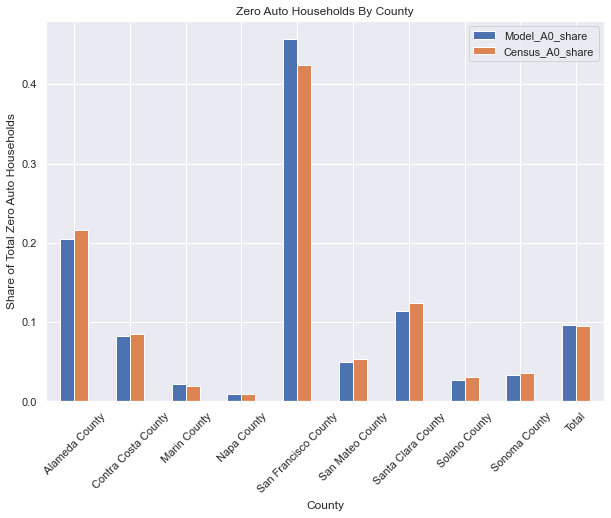

In [24]:
ax = model_v_census_A0[['Model_A0_share', 'Census_A0_share']].plot.bar(rot=0, figsize=(10,7))
plt.xticks(rotation=45)
plt.title("Zero Auto Households By County")
plt.ylabel("Share of Total Zero Auto Households")
plt.show()

In [25]:
model_v_census_A0['coef_change']

County
 Alameda County          0.054422
 Contra Costa County     0.031567
 Marin County           -0.111367
 Napa County             0.035174
 San Francisco County   -0.074247
 San Mateo County        0.075045
 Santa Clara County      0.083762
 Solano County           0.126370
 Sonoma County           0.089430
Total                   -0.006048
Name: coef_change, dtype: float64

In [26]:
ao_regionwide['Model_share'] = ao_regionwide['Model'] / ao_regionwide.loc['Total', 'Model']
ao_regionwide['Census_share'] = ao_regionwide['Census'] / ao_regionwide.loc['Total', 'Census']
ao_regionwide['coef_change'] = np.log(ao_regionwide['Census_share'] / ao_regionwide['Model_share'])
ao_regionwide

,Model,Census,difference,percent_diff,Model_share,Census_share,coef_change
0,265932,257569,8363,3.246897,0.095944,0.095362,-0.006088
1,861872,837738,24134,2.880853,0.310950,0.310163,-0.002536
2,1010316,981769,28547,2.907710,0.364507,0.363489,-0.002797
3,414290,409090,5200,1.271114,0.149470,0.151461,0.013234
4,219324,214795,4529,2.108522,0.079129,0.079525,0.004999
Total,2771734,2700961,70773,2.620290,1.000000,1.000000,0.000000


In [27]:
ao_regionwide['coef_change'].values

array([-0.00608751, -0.00253588, -0.0027969 ,  0.01323445,  0.00499948,
        0.        ])

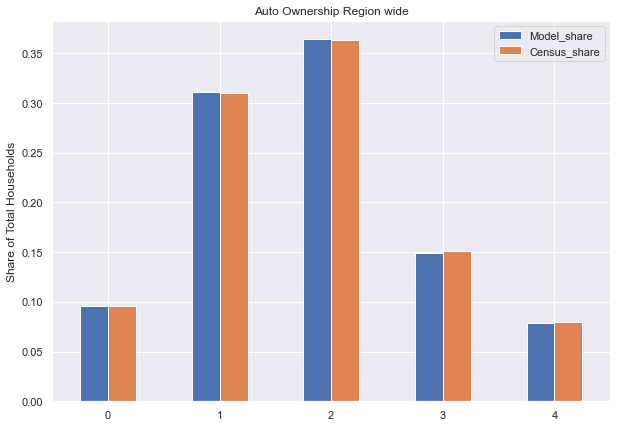

In [28]:
ax = ao_regionwide.loc[ao_regionwide.index != 'Total',['Model_share', 'Census_share']].plot.bar(rot=0, figsize=(10,7))
# plt.xticks(rotation=45)
plt.title("Auto Ownership Region wide")
plt.ylabel("Share of Total Households")
plt.show()